## Sanity Check for meta.csv vs wav files

In [ ]:
import os
import pandas as pd

def check_files_in_directory(csv_file, directory):
    # Step 1: Read the CSV file
    df = pd.read_csv(csv_file, delimiter='\t')
    print(df)
    # Step 2: List files in the directory
    files_in_directory = os.listdir(directory)
    
    # Step 3: Compare file names
    missing_files = []
    for file_name in df['filename']:
        file_name = os.path.basename(file_name)  # Extract filename from path
        if file_name not in files_in_directory:
            missing_files.append(file_name)
    
    # Step 4: Report results
    if len(missing_files) == 0:
        print("All files described in the CSV are present in the directory.")
    else:
        print("The following files are missing from the directory:")
        for missing_file in missing_files:
            print(missing_file)

# Example usage:
csv_file = "D:\Sean\DCASE\datasets\Extract_to_Folder\TAU-urban-acoustic-scenes-2022-mobile-development\meta.csv"
directory = "D:\Sean\DCASE\datasets\Extract_to_Folder\TAU-urban-acoustic-scenes-2022-mobile-development\\audio"
check_files_in_directory(csv_file, directory)


## Checking Logit values

In [ ]:
import torch

# Specify the path to the logits file
logits_file_path = "D:\Sean\github\dcase2024_task1\predictions\904bkzkq\logits.pt"

# Load the tensors from the file
logits = torch.load(logits_file_path)

# Now you can inspect the loaded logits
print(logits)


## WANDB API Get Run data

Run: FocusNet_2


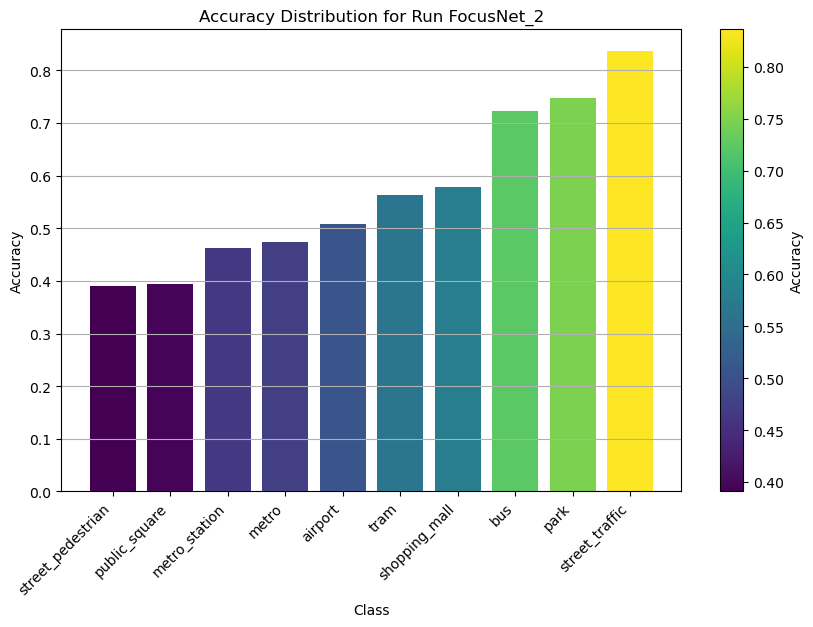


Run: FocusNet_1


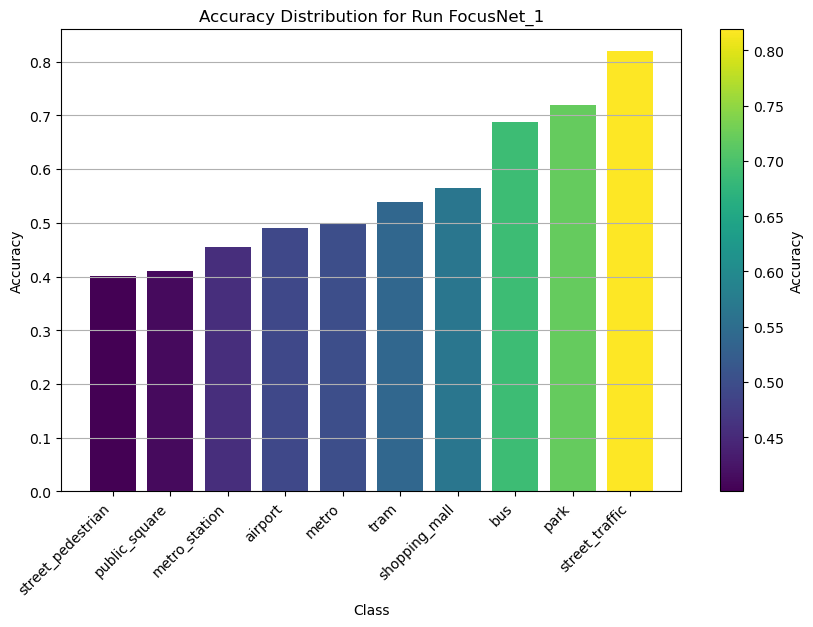


Run: FocusNet_2
Run: FocusNet_1


In [40]:
import pandas as pd
import wandb
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
# Define the entity and project
entity, project = "seanyeo300", "DCASE24_Task1"

# List of run IDs to extract
run_id_list = ["eqof0i23", "mxllj5x1"]

# Initialize the WandB API
api = wandb.Api()

summary_list, name_list = [], []

# Iterate through the run_id_list
for run_id in run_id_list:
    # Fetch the run from the API
    run = api.run(f"{entity}/{project}/{run_id}")

    # Append relevant information to respective lists
    summary_list.append(run.summary._json_dict)
    name_list.append(run.name)

# Create a DataFrame from the collected information
runs_df = pd.DataFrame(
    {"summary": summary_list, "name": name_list},
    index=name_list  # Set the index to the run IDs
)

# List of classes to plot histograms for
classes_to_plot = [
    "airport", "bus", "street_pedestrian", "street_traffic",
    "shopping_mall", "park", "tram", "public_square",
    "metro", "metro_station"
]

# Access the dictionaries in the "summary" column
for name, summary_dict in runs_df["summary"].items():
    print(f"Run: {name}")
    
    # Initialize a figure for the histograms
    plt.figure(figsize=(10, 6))
    
    # Initialize lists to store accuracy values and class names
    accuracy_values = []
    class_names = []
    
    # Iterate over each class to plot its accuracy histogram
    for class_name in classes_to_plot:
        key = f"test/acc.{class_name}"  # Generate the key for the accuracy of the current class
        if key in summary_dict:  # Check if the key exists in the summary dictionary
            # Append accuracy value of the current class to the list
            accuracy_values.append(summary_dict[key])
            class_names.append(class_name)
    
    # Sort the class names based on accuracy values
    sorted_indices = sorted(range(len(accuracy_values)), key=lambda i: accuracy_values[i])
    sorted_class_names = [class_names[i] for i in sorted_indices]
    sorted_accuracy_values = [accuracy_values[i] for i in sorted_indices]
    
    # Set up color map and normalize
    color_map = plt.cm.viridis
    norm = Normalize(vmin=min(sorted_accuracy_values), vmax=max(sorted_accuracy_values))
    color_intensities = [norm(accuracy) for accuracy in sorted_accuracy_values]
    
    # Plot a bar chart for the accuracy values of each class
    plt.bar(sorted_class_names, sorted_accuracy_values, color=color_map(color_intensities))
    
    # Add labels and title
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Distribution for Run {name}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    
    # Remove vertical gridlines
    plt.grid(axis='y')
    
    # Add color bar for reference
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), ax=plt.gca())
    cbar.set_label('Accuracy')
    
    plt.show()
    print()  # For visual separation


# List of classes to plot histograms for
classes_to_plot = [
    "airport", "bus", "street_pedestrian", "street_traffic",
    "shopping_mall", "park", "tram", "public_square",
    "metro", "metro_station"
]

# Initialize lists to store accuracy values for all models
all_model_accuracy_values = [[] for _ in range(len(classes_to_plot))]

# Access the dictionaries in the "summary" column
for name, summary_dict in runs_df["summary"].items():
    print(f"Run: {name}")
    
    # Iterate over each class to collect accuracy values for all models
    for i, class_name in enumerate(classes_to_plot):
        key = f"test/acc.{class_name}"  # Generate the key for the accuracy of the current class
        if key in summary_dict:  # Check if the key exists in the summary dictionary
            all_model_accuracy_values[i].append(summary_dict[key])
################################
# Calculate average accuracy for each class across all models
avg_accuracies_all_models = [sum(accuracies) / len(accuracies) for accuracies in all_model_accuracy_values]

# Sort classes in ascending order of average accuracy
sorted_indices = sorted(range(len(avg_accuracies_all_models)), key=lambda i: avg_accuracies_all_models[i])
sorted_classes = [classes_to_plot[i] for i in sorted_indices]
sorted_avg_accuracies = [avg_accuracies_all_models[i] for i in sorted_indices]

# Set up color map and normalize
color_map = plt.cm.viridis
norm = Normalize(vmin=min(sorted_avg_accuracies), vmax=max(sorted_avg_accuracies))
color_intensities = [norm(accuracy) for accuracy in sorted_avg_accuracies]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_classes, sorted_avg_accuracies, color=color_map(color_intensities))
plt.xlabel('Class')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracies for Each Class Across All Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add color bar for reference
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), ax=plt.gca())
cbar.set_label('Accuracy (%)')

plt.tight_layout()
plt.show()
######################################



## Plotting Manually

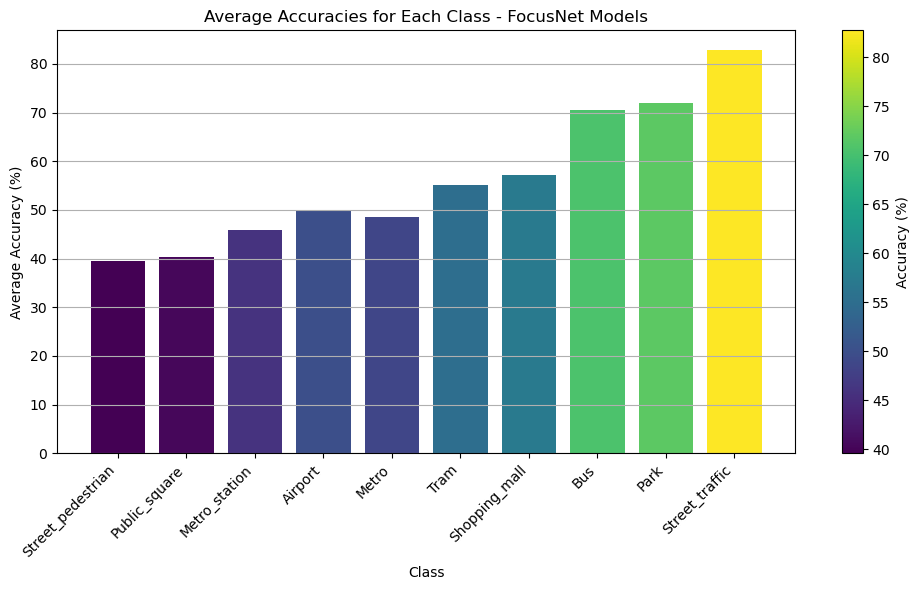

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# FocusNet 1 results
focusnet1 = {
    'Street_pedestrian': 40.10,
    'Public_square': 41.11,
    'Metro_station': 45.56,
    'Airport': 49.12,
    'Metro': 49.90,
    'Tram': 53.82,
    'Shopping_mall': 56.46,
    'Bus': 68.78,
    'Park': 71.95,
    'Street_traffic': 81.88
}

# FocusNet 2 results
focusnet2 = {
    'Street_pedestrian': 39.10,
    'Public_square': 39.46,
    'Metro_station': 46.29,
    'Metro': 47.34,
    'Airport': 50.84,
    'Tram': 56.32,
    'Shopping_mall': 57.81,
    'Park': 71.95,
    'Bus': 72.29,
    'Street_traffic': 83.60
}

# Average accuracies for each class
classes = list(focusnet1.keys())
avg_accuracies = [(focusnet1[class_] + focusnet2[class_]) / 2 for class_ in classes]

# Calculate color intensity based on average accuracies
color_map = plt.cm.viridis
norm = Normalize(vmin=min(avg_accuracies), vmax=max(avg_accuracies))
color_intensities = [norm(accuracy) for accuracy in avg_accuracies]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(classes, avg_accuracies, color=color_map(color_intensities))
plt.xlabel('Class')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracies for Each Class - FocusNet Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add color bar for reference
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), ax=plt.gca())
cbar.set_label('Accuracy (%)')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Baseline 1 results
baseline1 = {
    'Public_square': 40.06,
    'Street_pedestrian': 41.44,
    'Metro_station': 45.56,
    'Metro': 48.79,
    'Airport': 51.75,
    'Shopping_mall': 58.38,
    'Tram': 58.01,
    'Bus': 74.07,
    'Park': 78.58,
    'Street_traffic': 81.61
}

# Baseline 2 results
baseline2 = {
    'Public_square': 33.74,
    'Street_pedestrian': 44.14,
    'Airport': 46.59,
    'Metro': 49.73,
    'Metro_station': 51.82,
    'Shopping_mall': 58.45,
    'Tram': 65.07,
    'Bus': 72.09,
    'Park': 77.54,
    'Street_traffic': 81.18
}

# FocusNet 1 results
focusnet1 = {
    'Street_pedestrian': 40.10,
    'Public_square': 41.11,
    'Metro_station': 45.56,
    'Airport': 49.12,
    'Metro': 49.90,
    'Tram': 53.82,
    'Shopping_mall': 56.46,
    'Bus': 68.78,
    'Park': 71.95,
    'Street_traffic': 81.88
}

# FocusNet 2 results
focusnet2 = {
    'Street_pedestrian': 39.10,
    'Public_square': 39.46,
    'Metro_station': 46.29,
    'Metro': 47.34,
    'Airport': 50.84,
    'Tram': 56.32,
    'Shopping_mall': 57.81,
    'Park': 71.95,
    'Bus': 72.29,
    'Street_traffic': 83.60
}

# Average accuracies for each class across Baseline models
avg_baseline_accuracies = [(baseline1[class_] + baseline2[class_]) / 2 for class_ in classes]

# Average accuracies for each class across FocusNet models
avg_focusnet_accuracies = [(focusnet1[class_] + focusnet2[class_]) / 2 for class_ in classes]

# Calculate color intensity based on average accuracies for Baseline models
baseline_color_map = plt.cm.viridis
baseline_norm = Normalize(vmin=min(avg_baseline_accuracies), vmax=max(avg_baseline_accuracies))
baseline_color_intensities = [baseline_norm(accuracy) for accuracy in avg_baseline_accuracies]

# Calculate color intensity based on average accuracies for FocusNet models
focusnet_color_map = plt.cm.magma_r
focusnet_norm = Normalize(vmin=min(avg_focusnet_accuracies), vmax=max(avg_focusnet_accuracies))
focusnet_color_intensities = [focusnet_norm(accuracy) for accuracy in avg_focusnet_accuracies]

# Plotting
plt.figure(figsize=(12, 6))

# Plot Baseline models
plt.bar(classes, avg_baseline_accuracies, color=baseline_color_map(baseline_color_intensities), label='Baseline Models')

# Plot FocusNet models
plt.bar(classes, avg_focusnet_accuracies, color=focusnet_color_map(focusnet_color_intensities), label='FocusNet Models', alpha=0.7)

plt.xlabel('Class')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracies for Each Class')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add color bar for reference
cbar_baseline = plt.colorbar(plt.cm.ScalarMappable(norm=baseline_norm, cmap=baseline_color_map), ax=plt.gca(), pad=0.1)
cbar_baseline.set_label('Baseline Accuracy (%)')

cbar_focusnet = plt.colorbar(plt.cm.ScalarMappable(norm=focusnet_norm, cmap=focusnet_color_map), ax=plt.gca(), pad=0.15)
cbar_focusnet.set_label('FocusNet Accuracy (%)')

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Baseline 1 results
baseline1 = {
    'Public_square': 40.06,
    'Street_pedestrian': 41.44,
    'Metro_station': 45.56,
    'Metro': 48.79,
    'Airport': 51.75,
    'Shopping_mall': 58.38,
    'Tram': 58.01,
    'Bus': 74.07,
    'Park': 78.58,
    'Street_traffic': 81.61
}

# Baseline 2 results
baseline2 = {
    'Public_square': 33.74,
    'Street_pedestrian': 44.14,
    'Airport': 46.59,
    'Metro': 49.73,
    'Metro_station': 51.82,
    'Shopping_mall': 58.45,
    'Tram': 65.07,
    'Bus': 72.09,
    'Park': 77.54,
    'Street_traffic': 81.18
}

# Average accuracies for each class across Baseline models
avg_baseline_accuracies = [(baseline1[class_] + baseline2[class_]) / 2 for class_ in classes]

# Calculate color intensity based on average accuracies for Baseline models
baseline_color_map = plt.cm.viridis
baseline_norm = Normalize(vmin=min(avg_baseline_accuracies), vmax=max(avg_baseline_accuracies))
baseline_color_intensities = [baseline_norm(accuracy) for accuracy in avg_baseline_accuracies]


# Plotting
plt.figure(figsize=(12, 6))

# Plot Baseline models
plt.bar(classes, avg_baseline_accuracies, color=baseline_color_map(baseline_color_intensities), label='Baseline Models')

plt.xlabel('Class')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracies for Each Class - DCASE 2024 Baseline Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add color bar for reference
cbar_baseline = plt.colorbar(plt.cm.ScalarMappable(norm=baseline_norm, cmap=baseline_color_map), ax=plt.gca(), pad=0.1)
cbar_baseline.set_label('Baseline Accuracy (%)')

plt.tight_layout()
plt.show()
